# Advertising Sales Channel Prediction Project

###### Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing¶

### Importing the important libraries for data reading and cleaning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###### Variable assign to the link of the data

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv'


In [3]:
df=pd.read_csv(url)

In [4]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
df.shape

(200, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [15]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [16]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Most of the data, barring newspaper, is normally or close to normally distributed.

There is a min value of 0.00 in radio which needs to be checked as it cannot be 0.

In [17]:
(df == 0).sum(axis=0)

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

There is only 1 value of 0 in the dataset. It can be ignored.

#### EDA

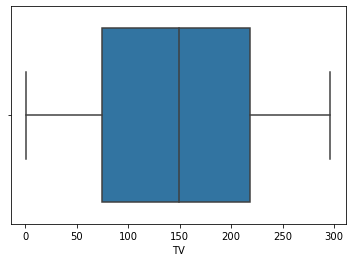

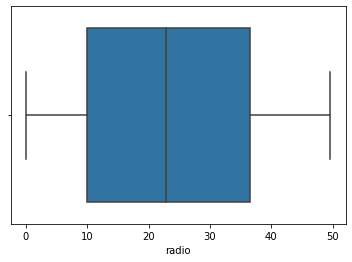

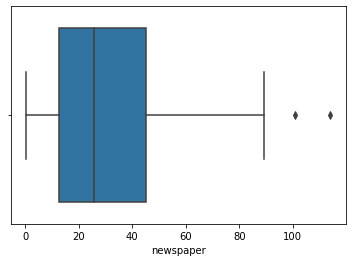

In [18]:
columns = ['TV','radio','newspaper']
for i in columns:
    sns.boxplot(df[i])
    plt.show()

There are minor outliers present in newspaper. We have to treat it before model fitting

Lets check the relationship of all the features with each other using pairplot


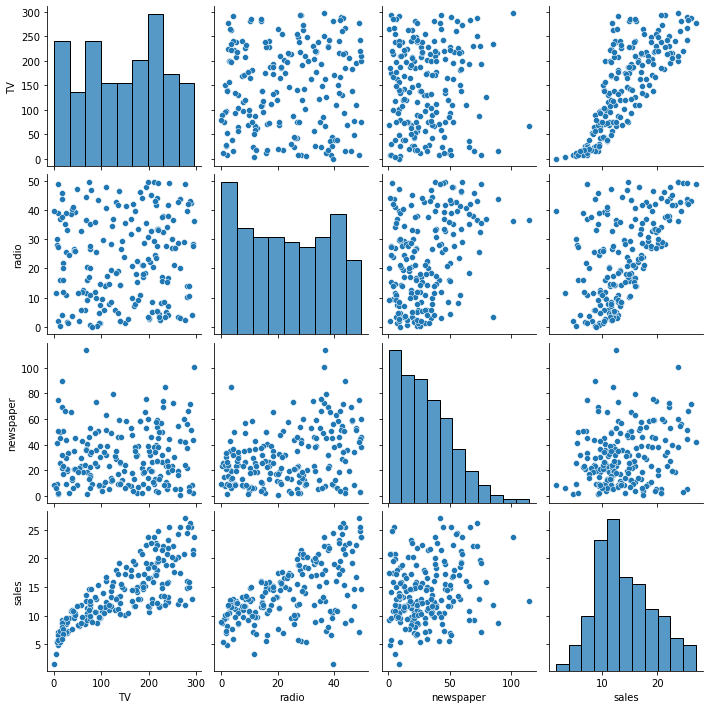

In [19]:
sns.pairplot(df)

TV has good linear relationship with Sales followed by Radio.

In [20]:
df['sales'].unique()


array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [21]:
df.sales.value_counts().sort_index()

1.6     1
3.2     1
4.8     1
5.3     2
5.5     1
       ..
24.7    1
25.4    3
25.5    1
26.2    1
27.0    1
Name: sales, Length: 121, dtype: int64

In [23]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


this shows the correlation of the dataset

In [25]:
df.mean()             #mean

TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

In [26]:
df.median()               #median

TV           149.75
radio         22.90
newspaper     25.75
sales         12.90
dtype: float64

In [27]:
df.mode()        #mode

,TV,radio,newspaper,sales
0,17.2,4.1,8.7,9.7
1,76.4,5.7,9.3,NaN
2,109.8,NaN,25.6,NaN
3,177.0,NaN,NaN,NaN
4,184.9,NaN,NaN,NaN
5,197.6,NaN,NaN,NaN
6,199.8,NaN,NaN,NaN
7,222.4,NaN,NaN,NaN
8,237.4,NaN,NaN,NaN
9,240.1,NaN,NaN,NaN


In [29]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

<AxesSubplot:xlabel='sales', ylabel='count'>

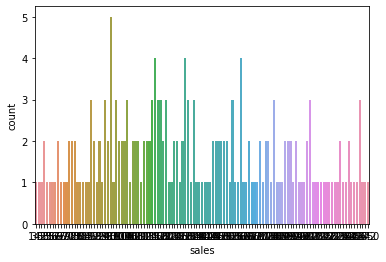

In [31]:
sns.countplot(x='sales', data=df)         #univariate analysis

<AxesSubplot:xlabel='TV', ylabel='count'>

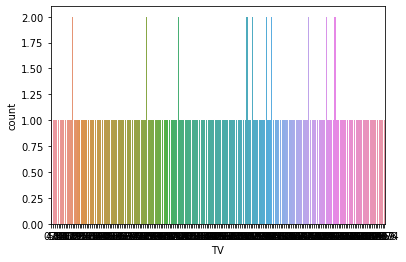

In [33]:
sns.countplot(x='TV', data=df)

<AxesSubplot:xlabel='radio', ylabel='count'>

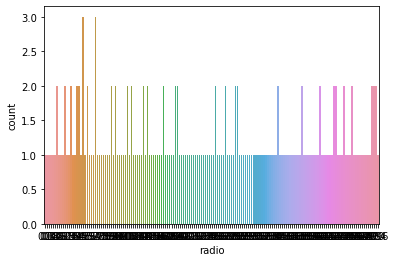

In [34]:
sns.countplot(x='radio', data=df)

data is imbalanced

<AxesSubplot:xlabel='newspaper', ylabel='count'>

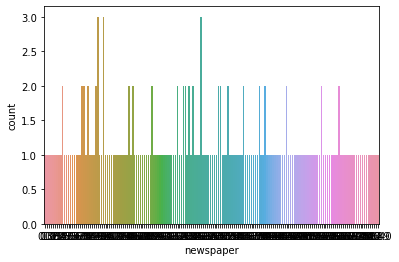

In [35]:
sns.countplot(x='newspaper', data=df)

[Text(0.5, 0, 'sales'),
 Text(0, 0.5, 'newspaper'),
 Text(0.5, 1.0, 'Advertising')]

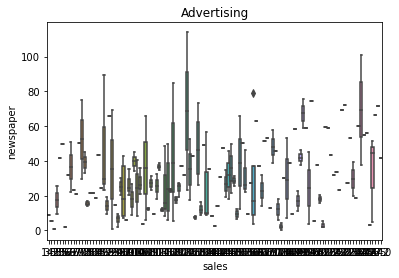

In [37]:
bx = sns.boxplot(x="sales", y='newspaper', data = df)     #bivariate analysis
bx.set(xlabel='sales', ylabel='newspaper', title='Advertising')

<AxesSubplot:xlabel='sales', ylabel='Density'>

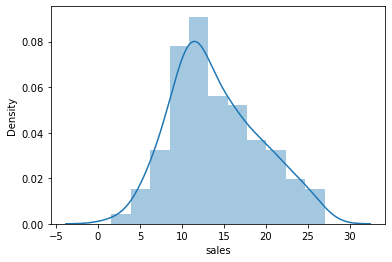

In [39]:
sns.distplot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

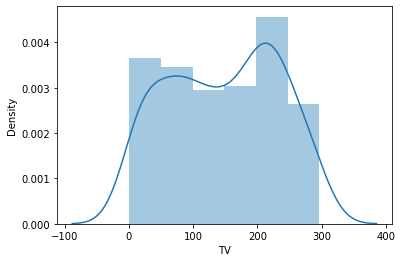

In [41]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

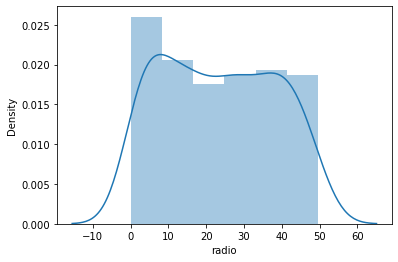

In [42]:
sns.distplot(df['radio'])

data is not normally distributed

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

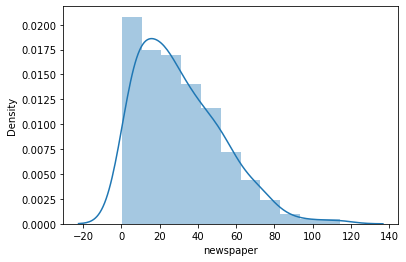

In [44]:
sns.distplot(df['newspaper'])

data is normally distributed

<AxesSubplot:xlabel='sales'>

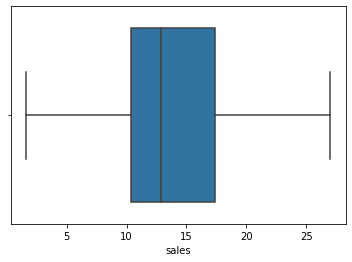

In [47]:
sns.boxplot(df['sales'])

<AxesSubplot:xlabel='TV'>

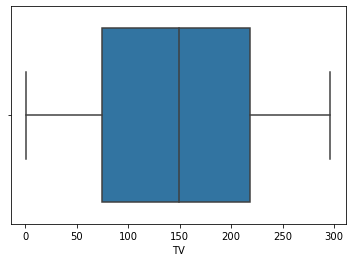

In [48]:
sns.boxplot(df['TV'])

there are no outliers

<AxesSubplot:xlabel='radio'>

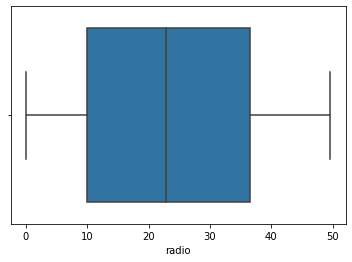

In [50]:
sns.boxplot(df['radio'])

there are no outliers

## bivariate analysis

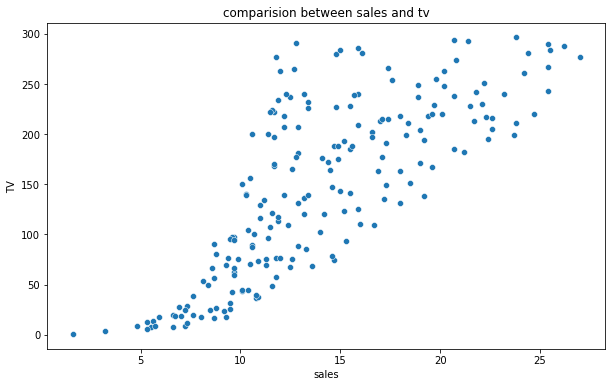

In [53]:
plt.figure(figsize=[10,6])
plt.title('comparision between sales and tv')
sns.scatterplot(df['sales'],df['TV']);

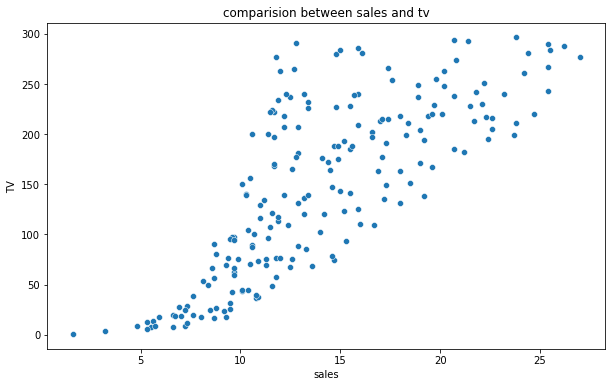

In [54]:
plt.figure(figsize=[10,6])
plt.title('comparision between sales and tv')
sns.scatterplot(df['sales'],df['TV']);

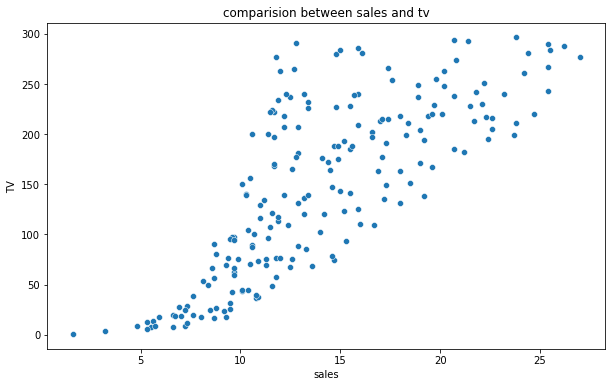

In [55]:
plt.figure(figsize=[10,6])
plt.title('comparision between sales and tv')
sns.scatterplot(df['sales'],df['TV']);

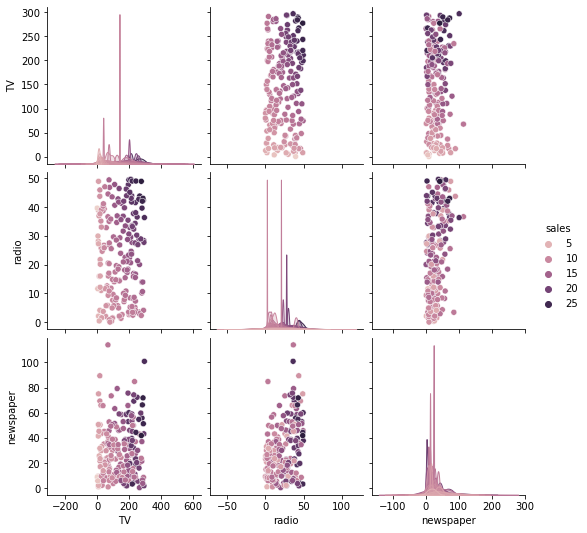

In [56]:
sns.pairplot(df,hue='sales')             #multivariate analysis

In [57]:
cor=df.corr               #multivariate analysis

In [58]:
cor

<bound method DataFrame.corr of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

<AxesSubplot:>

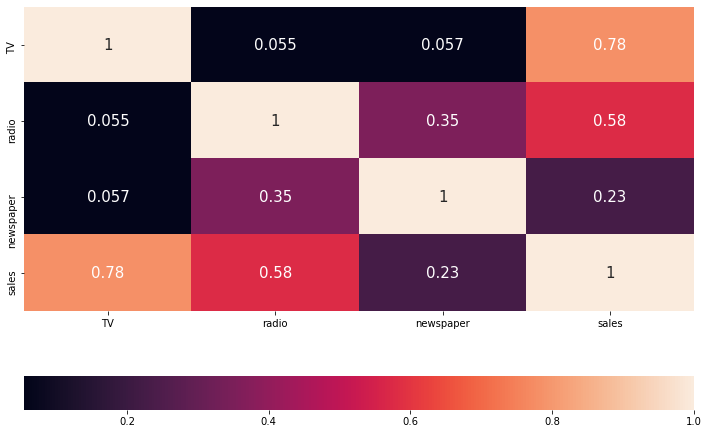

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cbar_kws={'orientation':'horizontal'},annot_kws={'size':15})

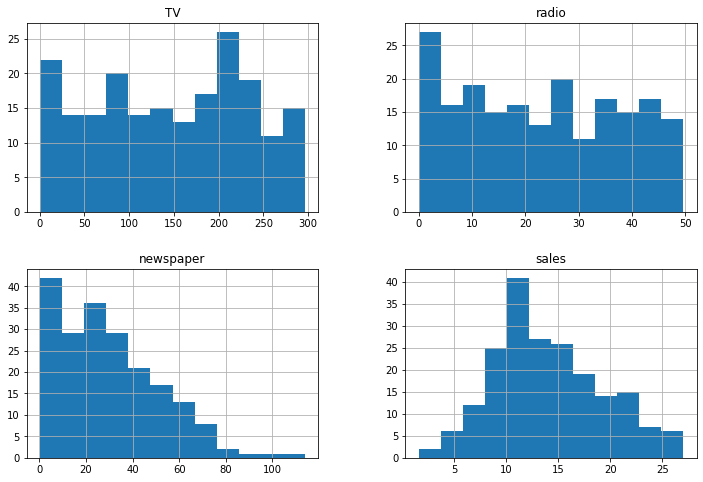

In [60]:
df.hist( bins = 12, figsize = (12,8))
plt.show()

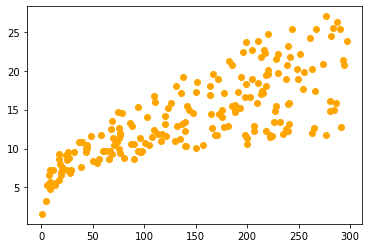

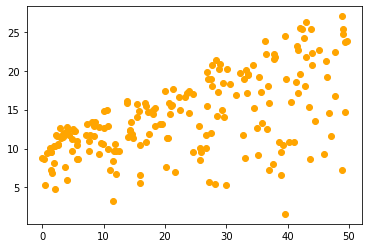

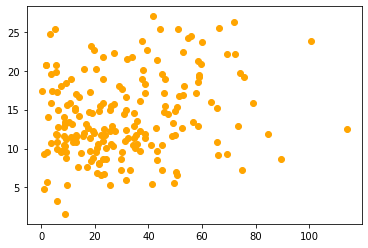

In [61]:
for i in columns:
    plt.scatter(x=df[i], y=df['sales'], c='orange')
    plt.show()

# Data Cleaning

Lets check for skewness now.

In [62]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

There is skewness present is newspaper and we will have to remove it.

we will remove the skew using cuberoot method

In [63]:
df['newspaper']=np.sqrt(df['newspaper'])

In [64]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

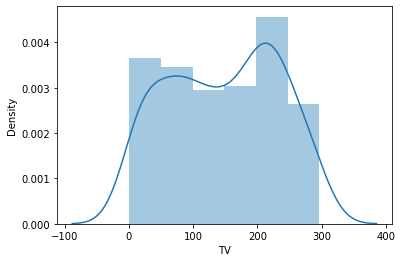

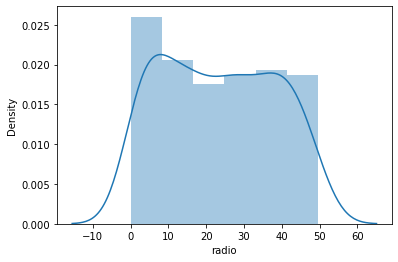

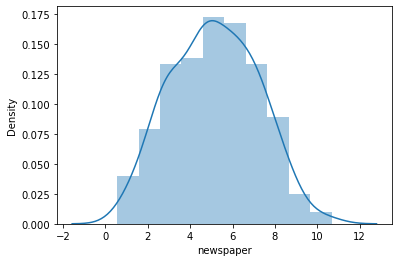

In [65]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

Great!!!

All our input features are normally distributed. Lets go ahead for model building

Splitting our data into input(x) and output(y) variable

In [66]:
x=df.drop(columns='sales')
y=df['sales']

Now we will standardize our data.

We wil be using StandardScaler for the same.

Lets import the required library

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

#### We have fit the data to sc_x

In [68]:
x=sc_x


x is assign to sc_x

In [69]:
x

array([[ 9.69852266e-01,  9.81522472e-01,  1.56309461e+00],
       [-1.19737623e+00,  1.08280781e+00,  7.74855194e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.56604912e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.23357596e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.23036007e+00],
       [-1.61540845e+00,  1.73103399e+00,  1.73106889e+00],
       [-1.04557682e+00,  6.43904671e-01, -1.43678801e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.52652825e-01],
       [-1.61657614e+00, -1.42906863e+00, -2.03568892e+00],
       [ 6.16042873e-01, -1.39530685e+00, -2.63332869e-01],
       [-9.45155670e-01, -1.17923146e+00, -1.08436840e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.54396138e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.46436938e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.20797302e+00],
       [ 6.66253447e-01,  6.50657027e-01,  8.07641928e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.04903522e+00],
       [-9.25304978e-01,  9.00494200e-01

Now we will move forward for model fitting

# Model Building

Importing the required libraries

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

We will use Linear regression model to check for the best random state to fit our training and test data

In [73]:

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.9066668117866912
At random state 0,the testing accuracy is: 0.8598489884868329


At random state 1,the training accuracy is: 0.8960824841182068
At random state 1,the testing accuracy is: 0.8918199802031089


At random state 2,the training accuracy is: 0.915522839623869
At random state 2,the testing accuracy is: 0.7546733523075339


At random state 3,the training accuracy is: 0.893231872053226
At random state 3,the testing accuracy is: 0.9124431849056786


At random state 4,the training accuracy is: 0.8912227064088659
At random state 4,the testing accuracy is: 0.9082554516311409


At random state 5,the training accuracy is: 0.895655123210421
At random state 5,the testing accuracy is: 0.898557314658452


At random state 6,the training accuracy is: 0.8917655782026647
At random state 6,the testing accuracy is: 0.9209209716361928


At random state 7,the training accuracy is: 0.8929101547219347
At random state 7,the testing accuracy is: 0.9095237

We will now split the data with the random_state 42 as that has given us the best accuracy on training and test data.


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)


Passing the model again

In [75]:

lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of LinearRegression is', train_score)
print('The test accuracy of LinearRegression is', test_score)

The training accuracy of LinearRegression is 0.8957994678890562
The test accuracy of LinearRegression is 0.8994550077374865


#### Fitting the data to SupportVectorRegression model

In [76]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8890378972252673
0.8019778933979981
0.9131799038362434


Kernel 'rbf' has given us the best output, hence we will select 'rbf' for testing the model


In [77]:

sv=SVR(kernel='rbf')
sv.fit(x_train,y_train)
pred_train=sv.predict(x_train)
pred_test=sv.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of SVR is', train_score)
print('The test accuracy of SVR is', test_score)

The training accuracy of SVR is 0.9131799038362434
The test accuracy of SVR is 0.8995851919787639


##### Checking our model through DecisionTreeRegressor¶

In [78]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of DT is', train_score)
print('The test accuracy of DT is', test_score)

The training accuracy of DT is 1.0
The test accuracy of DT is 0.9498472825199127


Now Let's use Random Forest Regressor model¶

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of RF is', train_score)
print('The test accuracy of RF is', test_score)

The training accuracy of RF is 0.9960662137934359
The test accuracy of RF is 0.9800777462167153


So far RFR has given us the best accuracy on training and testing data



### Cross Validation¶



We will cross validate our model

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:

model=(lr,dt,sv,rf)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LinearRegression()
0.8873331295445761


Mean Accuracy of DecisionTreeRegressor()
0.9572268008290493


Mean Accuracy of SVR()
0.9011953652320344


Mean Accuracy of RandomForestRegressor()
0.9766666749581585




Lets visualize all our model performance so far



In [84]:
Performance={'Model':['LR','SVR','DTR','RFR'],
           'Trainig Score':[0.89,0.91,1.0,0.99],
           'Testing score':[0.89,0.89,0.92,0.98],
           'CV Score':[0.88,0.87, 0.95, 0.97]}

In [85]:
Model=pd.DataFrame(data=Performance)

In [86]:
Model

,Model,Trainig Score,Testing score,CV Score
0,LR,0.89,0.89,0.88
1,SVR,0.91,0.89,0.87
2,DTR,1.00,0.92,0.95
3,RFR,0.99,0.98,0.97


We can conclude that RandomforestRegressor Model has performed best.

# Normalization and HyperTuning


Importing the required libraries for normalizing the coefficients and Hypertuning our model


In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

Using Lasso for Normalization

Lets check the best parameters for Lasso

In [88]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [89]:

ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8982753162349368

In [90]:

cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8884792606387284

We got 0.89 score for training and 0.88 through cross validation from Lasso¶


Select parameters for Hypertuning the RFR model



In [91]:
parameters={'max_features':['auto','sqrt','log2'],'criterion':['mse','mae'],'max_depth':np.arange(2,10)}


In [92]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)


Fitting the model to Grid Seach to check for the best parameters



In [93]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [94]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 9, 'max_features': 'auto'}

The above gave us the best parameters to fit the model

Lets prepare our model using this parameters

In [95]:
Finalmod=RandomForestRegressor(criterion='mse', max_depth= 8, max_features= 'auto')
Finalmod.fit(x_train,y_train)
pred_final=Finalmod.predict(x_test)
rfs=r2_score(y_test,pred_final)
print('R2 Score', rfs*100)

rfscore=cross_val_score(Finalmod,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val score', rfc*100)

R2 Score 98.00913242494325
Cross Val score 97.58523664907713


We have got good accuracy of 98% on training and 97% on Cross validation¶


Lets Visualize our model¶


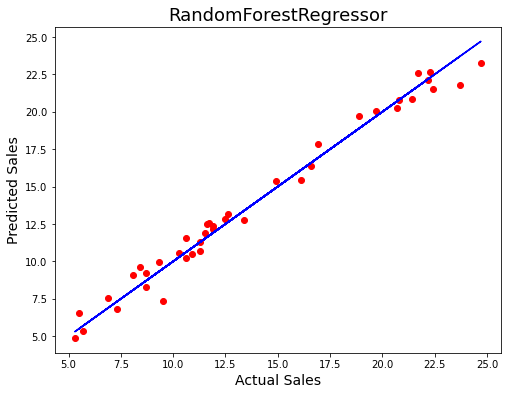

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_final,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

We can see that the line fits near the predicted values. Hence we can conclude our model is performing well.



In [97]:
import joblib
joblib.dump(Finalmod,'Advertising_Sales.obj')

['Advertising_Sales.obj']